In [46]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import numpy as np                                   # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                  # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                      # 시각화 설정 클래스입니다.

from sklearn.tree import DecisionTreeClassifier      # 사용할 머신러닝 알고리즘입니다.
from sklearn.tree import plot_tree                   # 의사결정나무 시각화 함수입니다.
from sklearn.metrics import plot_confusion_matrix    # 모델 성능평가를 위한 함수입니다.


plt.rcParams['figure.figsize'] = [16, 8]

# 학습 데이터를 불러옵니다.
train = pd.read_csv('./train.csv', sep=',', encoding='utf-8')
x_train = train.drop(['target', 'species'], axis=1).values
y_train = train['species'].values

# 테스트 데이터를 불러옵니다.
test = pd.read_csv('./test.csv', sep=',', encoding='utf-8')
x_test = test.drop(['target', 'species'], axis=1).values
y_test = test['species'].values

# 의사결정나무 분류기를 불러옵니다.
model = DecisionTreeClassifier(
    max_depth=4
)

# 의사결정나무 분류기를 학습합니다.
model.fit(x_train, y_train)

# 테스트 데이터로 예측합니다.
pred = model.predict(x_test)
test['prediction'] = pred

# 테스트 데이터로 정확성을 확인합니다.
print('Accuracy: ', model.score(x_test, y_test) * 100)

Accuracy:  96.0


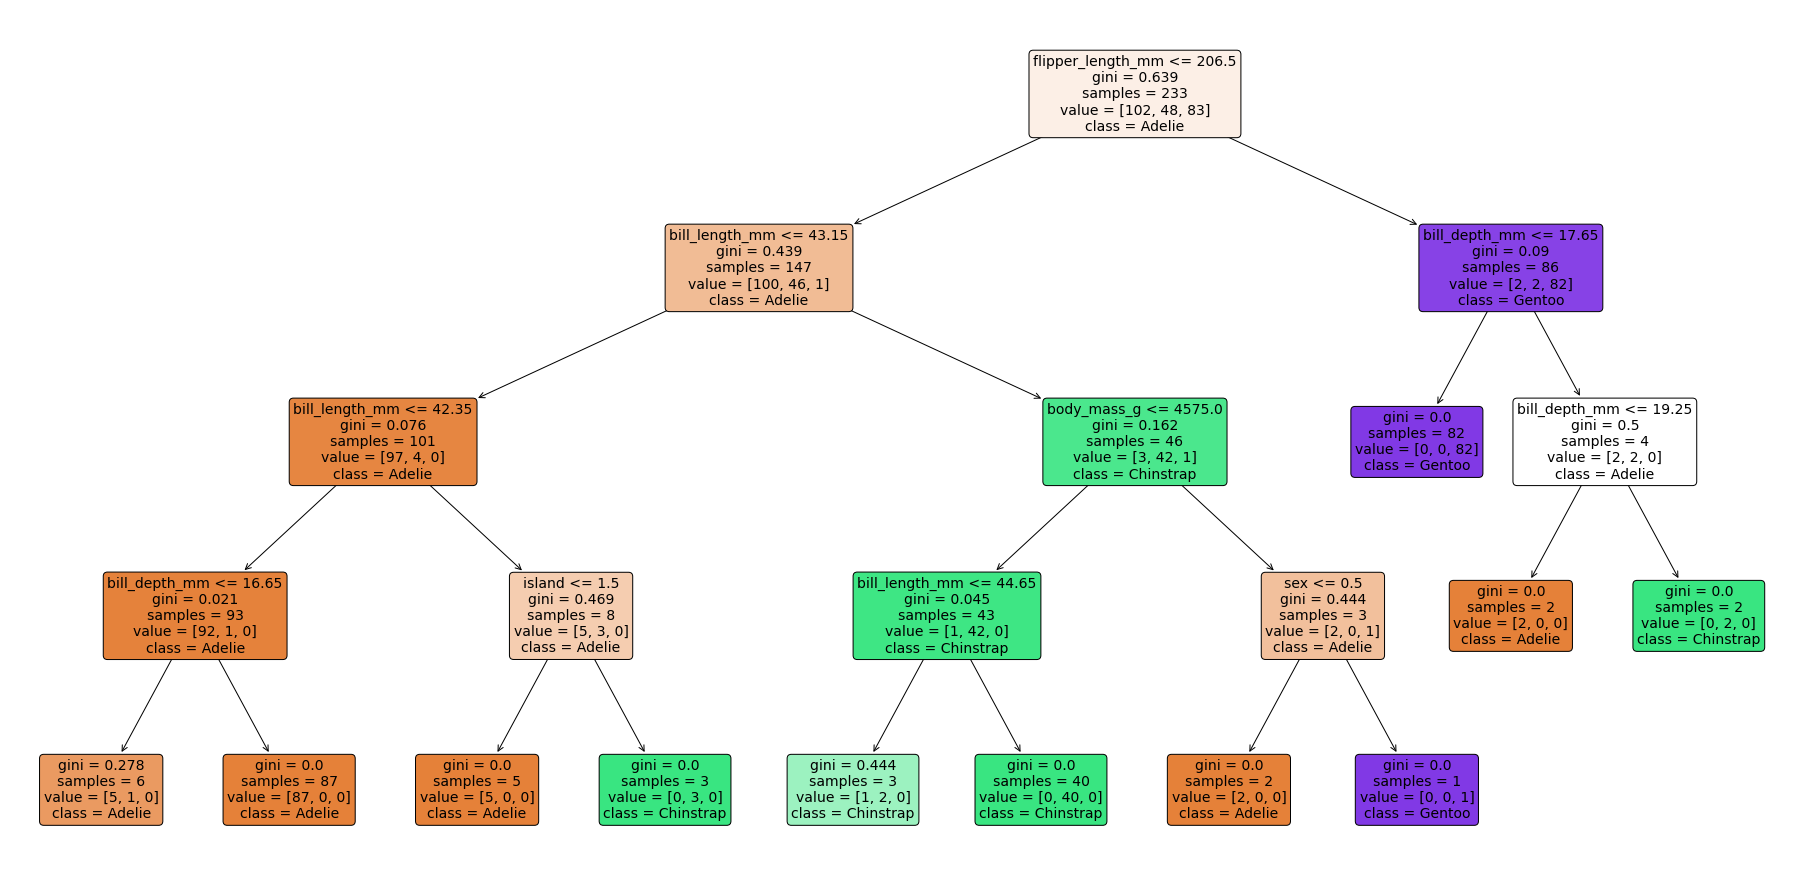

In [47]:
plt.figure(figsize=(32, 16))
plot_tree(
    decision_tree=model,
    feature_names=test.columns[:6],
    class_names=['Adelie', 'Chinstrap', 'Gentoo'],
    filled=True,
    proportion=False,
    rounded=True,
    fontsize=14
)
plt.show()

<Figure size 1152x576 with 0 Axes>

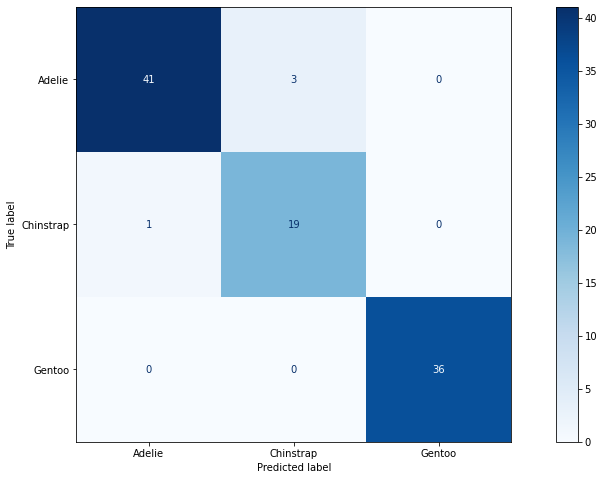

In [48]:
plt.figure()
plot_confusion_matrix(
    model,
    x_test,
    y_test,
    display_labels=['Adelie', 'Chinstrap', 'Gentoo'],
    cmap=plt.cm.Blues
)
plt.show()